In [13]:
from keras.datasets import mnist
import numpy as np

In [14]:
(x_train, _), (x_test, _) = mnist.load_data()

In [15]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


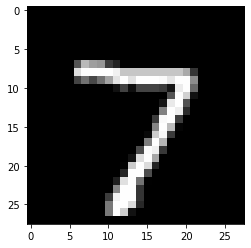

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28, 28))
plt.gray()

In [17]:
import keras
from keras import layers

encoding_dimension = 24
# 24 float, it means that we have a compression factor of 784
# (image input shape) / 24 = 32.7

input_image = keras.Input(shape = (784,))
encoded = layers.Dense(encoding_dimension, activation = 'relu') (input_image)
decoded = layers.Dense(784, activation = 'sigmoid') (encoded)

autoencoder = keras.Model(input_image, decoded)

encoder = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape = (encoding_dimension, ))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
# per-pixel binary crossentropy loss

In [18]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, 
                    shuffle = True, validation_data = (x_test, x_test))

encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

Epoch 1/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2901 - val_loss: 0.2036
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1832 - val_loss: 0.1656
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1562 - val_loss: 0.1455
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1401 - val_loss: 0.1330
Epoch 5/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1303 - val_loss: 0.1252
Epoch 6/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1241 - val_loss: 0.1204
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1201 - val_loss: 0.1170
Epoch 8/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1170 - val_loss: 0.1143
Epoch 9/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1144 - val_loss: 0.1118
Epoch 10/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1123 - val_lo

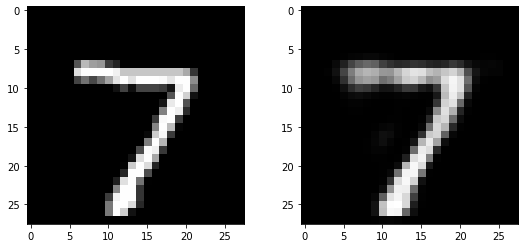

In [19]:
plt.figure(figsize = (9, 4))
plt.subplot(121)
plt.imshow(x_test[0].reshape(28, 28))
plt.gray()
plt.subplot(122)
plt.imshow(decoded_images[0].reshape(28, 28))
plt.gray()